# Data Preparation

In [1]:
# Import Library
import pandas as pd
import math
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import style
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from itertools import permutations
from random import sample
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import silhouette_score

In [2]:
# Import dataset
kd_train = pd.read_csv("/content/drive/MyDrive/Kuliah/Semester 6/ML_Malin_Machine Learning/Tugas/Tubes 1/kendaraan/kendaraan_train.csv")

In [3]:
kd_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [4]:
# Generate descriptive statistics of dataset
kd_train.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# Preprocessing

In [5]:
# Preprocessing Step
# Data Cleaning and Label Encoder
def enc_clean(data):
  #### Integer Encode ####
  data.drop(['id', 'Tertarik'], axis=1, inplace=True) # Drop Coloumn Id and Tertarik
  data['Jenis_Kelamin'] = data['Jenis_Kelamin'].str.replace('Pria','1') # Replace Pria to 1
  data['Jenis_Kelamin'] = data['Jenis_Kelamin'].str.replace('Wanita','0') # Replace Wanita to 0
  data['Kendaraan_Rusak'] = data['Kendaraan_Rusak'].str.replace('Pernah','1') # Replace Pernah to 1
  data['Kendaraan_Rusak'] = data['Kendaraan_Rusak'].str.replace('Tidak','0') # Replace Pernah to 0
  data['Jenis_Kelamin'] = pd.to_numeric(data["Jenis_Kelamin"]) # Convert Jenis_Kelamin Coloumn to numeric type
  data['Kendaraan_Rusak'] = pd.to_numeric(data["Kendaraan_Rusak"]) # Convert kendaraan_Risal Coloumn to numeric type
  ## Integer Encoder With Label Encoder Library ##
  data['Umur_Kendaraan'] = data['Umur_Kendaraan'].astype(str) # Convert Umur_Kendaraan Coloumn to string type
  labelencoder = LabelEncoder() # Call label encoder library
  data["Umur_Kendaraan"] = labelencoder.fit_transform(data["Umur_Kendaraan"])
  data['Umur_Kendaraan'] = data['Umur_Kendaraan'].replace(3,round(data["Jenis_Kelamin"].mean())) # Replace all 3 value with coloumn mean 
  ## Integer Encoder With Label Encoder Library ##
  #### Integer Encode ####

  #### Fill NaN Value With Mean Of Each Coloumns ##
  features = ["Jenis_Kelamin", "Umur", "SIM", "Kode_Daerah", "Sudah_Asuransi", "Umur_Kendaraan", "Kendaraan_Rusak", "Premi", "Kanal_Penjualan", "Lama_Berlangganan"]
  for i in features: 
      data[i].fillna(round(data[i].mean()),inplace=True) #Fill every NaN with Mean
  return data
  #### Fill NaN Value With Mean Of Each Coloumns ##

In [6]:
### Feature Selection to Drop ###
def correlation(data, cor):
    corelation = set() 
    cm = data.corr() # Save feature correlation to cm
    for i in range(len(cm.columns)):
        for j in range(i):
            if abs(cm.iloc[i, j]) > cor: 
                coloumn_name = cm.columns[i]  
                corelation.add(coloumn_name)
    return corelation

In [7]:
## enc_clean Function Result ##
df = enc_clean(kd_train)
df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.0,30.0,1.0,33.0,1.0,1,0.0,28029.0,152.0,97.0
1,1.0,48.0,1.0,39.0,0.0,2,1.0,25800.0,29.0,158.0
2,1.0,21.0,1.0,46.0,1.0,1,0.0,32733.0,160.0,119.0
3,0.0,58.0,1.0,48.0,0.0,0,0.0,2630.0,124.0,63.0
4,1.0,50.0,1.0,35.0,0.0,2,1.0,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,1,0.0,25988.0,152.0,217.0
285827,0.0,21.0,1.0,46.0,1.0,1,0.0,44686.0,152.0,50.0
285828,0.0,23.0,1.0,50.0,1.0,1,0.0,49751.0,152.0,226.0
285829,1.0,68.0,1.0,7.0,1.0,0,0.0,30503.0,124.0,270.0


Text(0.5, 1.0, 'Multi-Collinearity of Something Attributes')

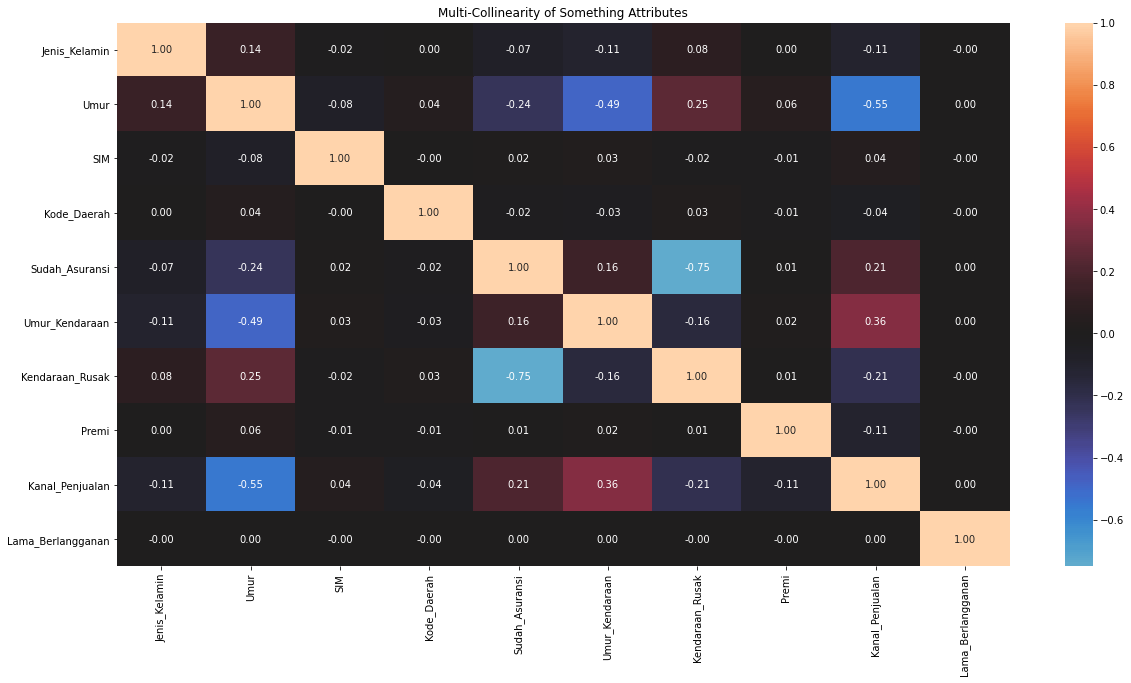

In [8]:
### Create HeatMap From Data (Without One Hot Encode) ###
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), center=0, annot=True, fmt=".2f")
ax.set_title('Multi-Collinearity of Something Attributes')
### Create HeatMap From Data (Without One Hot Encode) ###

In [9]:
corr_features = correlation(df, 0.5)

In [10]:
corr_features

{'Kanal_Penjualan', 'Kendaraan_Rusak'}

In [11]:
## Drop Coloumn from Feature Selection Result ##
df.drop(corr_features, axis=1, inplace=True)

In [12]:
df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Premi,Lama_Berlangganan
0,0.0,30.0,1.0,33.0,1.0,1,28029.0,97.0
1,1.0,48.0,1.0,39.0,0.0,2,25800.0,158.0
2,1.0,21.0,1.0,46.0,1.0,1,32733.0,119.0
3,0.0,58.0,1.0,48.0,0.0,0,2630.0,63.0
4,1.0,50.0,1.0,35.0,0.0,2,34857.0,194.0
...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,1,25988.0,217.0
285827,0.0,21.0,1.0,46.0,1.0,1,44686.0,50.0
285828,0.0,23.0,1.0,50.0,1.0,1,49751.0,226.0
285829,1.0,68.0,1.0,7.0,1.0,0,30503.0,270.0


In [13]:
### Variance Threshold Function ###
def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [14]:
## Remove Coloumn With Variance Threshold ##
df_v = variance_threshold_selector(df)

In [15]:
df_v

,Umur,Kode_Daerah,Premi,Lama_Berlangganan
0,30.0,33.0,28029.0,97.0
1,48.0,39.0,25800.0,158.0
2,21.0,46.0,32733.0,119.0
3,58.0,48.0,2630.0,63.0
4,50.0,35.0,34857.0,194.0
...,...,...,...,...
285826,23.0,4.0,25988.0,217.0
285827,21.0,46.0,44686.0,50.0
285828,23.0,50.0,49751.0,226.0
285829,68.0,7.0,30503.0,270.0


In [16]:
# Drop Premi Because The Values is different significant from othe feature
df_v = df_v.drop(['Premi'], axis=1)

In [17]:
df_v

,Umur,Kode_Daerah,Lama_Berlangganan
0,30.0,33.0,97.0
1,48.0,39.0,158.0
2,21.0,46.0,119.0
3,58.0,48.0,63.0
4,50.0,35.0,194.0
...,...,...,...
285826,23.0,4.0,217.0
285827,21.0,46.0,50.0
285828,23.0,50.0,226.0
285829,68.0,7.0,270.0


In [18]:
## Normalization With Z-Score ##
df_norm = (df_v - df_v.mean())/df_v.std() 
df_norm

,Umur,Kode_Daerah,Lama_Berlangganan
0,-0.585004,0.512102,-0.701688
1,0.604556,0.976603,0.045671
2,-1.179784,1.518520,-0.432149
3,1.265422,1.673353,-1.118249
4,0.736729,0.666936,0.486736
...,...,...,...
285826,-1.047611,-1.732983,0.768527
285827,-1.179784,1.518520,-1.277522
285828,-1.047611,1.828187,0.878793
285829,1.926289,-1.500732,1.417872


# K-Means Model

In [19]:
### Set Initial Centroids ###
def initiate_centroid(cents):
  centroid = {} # Initiate centroid as empty dictionary
  j = 0 # initiate j as 0
  for i in cents:
    centroid[j] = cents[j] # Assign centroid[j] with cents[j]
    j+=1 # Increment j
  return centroid

In [20]:
### Calculate Distace From Point to Centroids ###
def euclidian_distance(data, centroid):
  d=0 # initiate distance as 0
  for i in range(len(data)):
    d += (data[i]-centroid[i])**2 # calculate euclidian distance
  return math.sqrt(d)

In [21]:
### Append Coordinate to its Cluster ###
def clusterisasi(k, data, centroid, dist_calc=False):
  c = {} # initiate cluster as empty dict
  sum_jarak = [] # initiate sum of distance as empty list
  label = [] # Initiate label as empty list
  for i in range(k): # loop in range number of cluster
    c[i] = [] # initiate every cluster with empty list
  for i in range((len(data))):
    d = [] # Initiate distance as empty list
    for j in range(k):
      d.append(euclidian_distance(data[i],centroid[j])) # Call euclidian distance function
      
  ## This if statement is for elbow method ##
    if (dist_calc):
      sum_jarak.append(min(d)) # Append the minimum distance to sum_jarak
  ## This if statement is for elbow method ##

    label.append(d.index(min(d))) # Append the index of minum distance to label
    c[d.index(min(d))].append(data[i]) # Append the index of minum distance to cluster
  if (dist_calc):
    return c, sum(sum_jarak)
  else:
    return c, label

In [22]:
### Recalculate Centroid ###
def recentroid(k, cluster, centroid, num_features):
  for i in range(k):
    avg = ["%.2f" %np.average([a[j] for a in cluster[i]]) for j in range(num_features)] # Calcluate average of all clusters
    avg = [float(i) for i in avg] # Change data type to float
    centroid[i] = avg
  return centroid

In [23]:
### Show Centroid in Plot ###
def check_centroid(data, centroid):
  plt.scatter([i[0] for i in data], [i[1] for i in data])
  for i in centroid.values():
    plt.scatter(i[0],i[1], color='r')
  plt.show()

In [43]:
### Plot All Cluster ###
def plotting(k, centroid, clusters, num_of_cluster):
  f = sample( [i for i in range(0,num_of_cluster)], 2)
  color = ["g", "orange", "c", "m","y","k","pink","blue","slategrey","fuchsia"]
  for i in range(k):
    plt.scatter([a[f[0]] for a in clusters[i]], [a[f[1]] for a in clusters[i]], c=color[i])
    plt.scatter(centroid[i][0],centroid[i][1], color='r')
  plt.show()

In [25]:
### Main Program ###
def k_mean_clustering(k, data, plot=False):
  tmp = []
  num_of_features = len(data.columns)
  cent = data.sample(n=k).values.tolist()
  data = data.values.tolist()
  centro = initiate_centroid(cent)
  while(tmp != centro): # Stop Loop When Centroid Before and After is same
    tmp = centro.copy()
    klaster, label = clusterisasi(k, data, centro)
    centro = recentroid(k, klaster, centro, num_of_features)
  if(plot):
    plotting(k, centro, klaster, num_of_features)
  return label


In [26]:
### Elbow Method Function ###
def elbow_method(data, k):
  tmp = []
  num_of_features = len(data.columns)
  cent = data.sample(n=k).values.tolist()
  data = data.values.tolist()
  centro = initiate_centroid(cent)
  while(tmp != centro): # Stop Loop When Centroid Before and After is same
    tmp = centro.copy()
    klaster, jarak = clusterisasi(k, data, centro, dist_calc=True)
    centro = recentroid(k, klaster, centro, num_of_features)
  return jarak
    

# Experiment

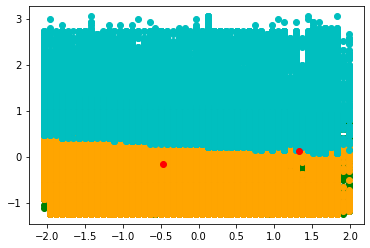

In [27]:
clust_1_b = df_norm
label = k_mean_clustering(3, clust_1_b, plot=True)

Text(0, 0.5, 'Within-cluster Sum of Squares')

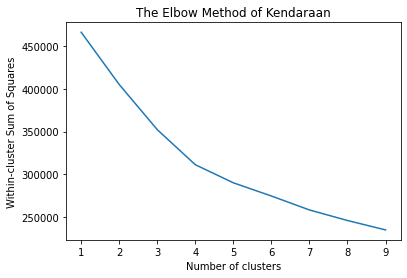

In [28]:
### Call Elbow Method Function ###
wcss=[]
for i in range(1,10):
    wcss_iter = elbow_method(clust_1_b, i)
    wcss.append(wcss_iter)
number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method of Kendaraan')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

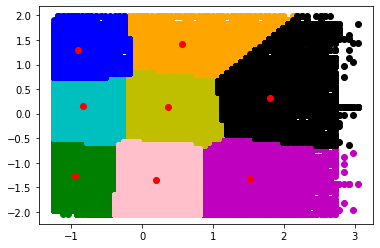

In [45]:
clust_1_a = df_norm.iloc[:, :2]
label = k_mean_clustering(8, clust_1_a, plot=True)
# print(label)

Text(0, 0.5, 'Within-cluster Sum of Squares')

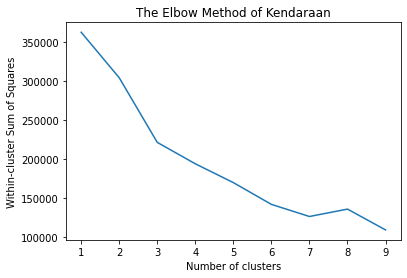

In [30]:
### Call Elbow Method Function ###
wcss=[]
for i in range(1,10):
    wcss_iter = elbow_method(clust_1_a, i)
    wcss.append(wcss_iter)
number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method of Kendaraan')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

Text(0.5, 1.0, 'Silhoutte Score')

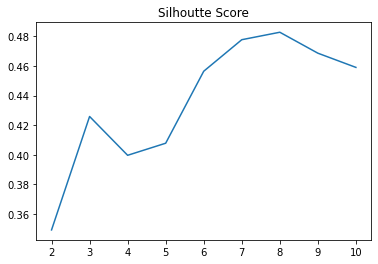

In [31]:
### Silhoutte Score For Find Best K ###
score = []
for i in range(2,11):
  label = k_mean_clustering(i, clust_1_a)
  score.append(silhouette_score(clust_1_a, label))


plt.plot([i for i in range(2,11)], score)
plt.title("Silhoutte Score")

In [32]:
### Using PCA For Dimensional Reduction ###
pca = PCA(n_components=2) # Reduce Feature into 2 Dimension
principalComponents = pca.fit_transform(df_norm)
df_PC = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [33]:
df_PC

,PC1,PC2
0,-0.010773,-0.749381
1,1.114173,0.092233
2,0.266655,-0.533335
3,2.137985,-1.015378
4,0.963584,0.543755
...,...,...
285826,-2.007024,0.685069
285827,0.314085,-1.375808
285828,0.505256,0.783000
285829,0.216743,1.577353


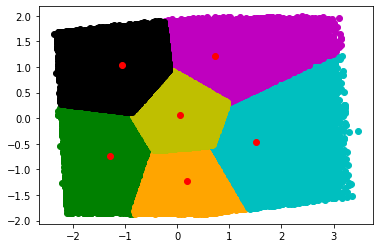

In [41]:
clust_pc = df_PC
label = k_mean_clustering(6, clust_pc, plot=True)

Text(0, 0.5, 'Within-cluster Sum of Squares')

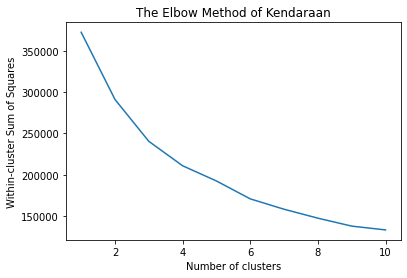

In [35]:
### Call Elbow Method Function ###
wcss=[]
for i in range(1,11):
    wcss_iter = elbow_method(clust_pc, i)
    wcss.append(wcss_iter)
number_clusters = range(1,11)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method of Kendaraan')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

Text(0.5, 1.0, 'Silhoutte Score')

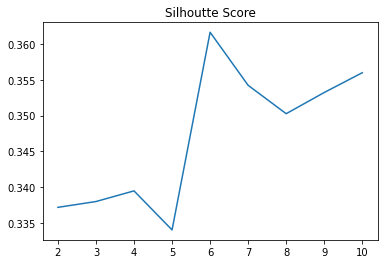

In [40]:
score = []
for i in range(2,11):
  label = k_mean_clustering(i, clust_pc)
  score.append(silhouette_score(clust_pc, label))


plt.plot([i for i in range(2,11)], score)
plt.title("Silhoutte Score")